In [1]:
import pandas as pd
df = pd.read_csv("/content/location_aware_gis_leakage_dataset.csv")

In [2]:
df.head(5)

,Pressure,Flow_Rate,Temperature,Vibration,RPM,Operational_Hours,Zone,Block,Pipe,Location_Code,Latitude,Longitude,Leakage_Flag
0,64.967142,73.643605,96.607526,2.928288,2104.485874,3380,Zone_4,Block_2,Pipe_3,Zone_4_Block_2_Pipe_3,25.162560,55.238018,0
1,58.617357,73.198788,98.472503,2.983672,2084.997078,2235,Zone_3,Block_4,Pipe_1,Zone_3_Block_4_Pipe_1,25.090473,55.162476,0
2,66.476885,53.065352,97.013095,3.032147,1719.044046,8762,Zone_2,Block_2,Pipe_5,Zone_2_Block_2_Pipe_5,25.279196,55.287601,0
3,75.230299,75.048647,100.552090,3.473431,2173.875267,8931,Zone_5,Block_3,Pipe_2,Zone_5_Block_3_Pipe_2,25.198326,55.269765,0
4,57.658466,90.992436,105.985893,2.626391,1552.975197,3403,Zone_3,Block_1,Pipe_1,Zone_3_Block_1_Pipe_1,25.099630,55.166098,0


In [3]:
df.shape

(5000, 13)

In [4]:
df.describe()

,Pressure,Flow_Rate,Temperature,Vibration,RPM,Operational_Hours,Latitude,Longitude,Leakage_Flag
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.056019,79.851892,100.052765,3.008258,1994.494314,5488.247800,25.183972,55.248892,0.064600
std,9.964798,15.156556,4.993849,0.501668,295.012393,2611.426293,0.059976,0.047702,0.245843
min,27.587327,21.163996,83.122104,1.071812,903.474045,1000.000000,25.081389,55.146015,0.000000
25%,53.420950,69.701256,96.695568,2.667660,1789.471968,3197.500000,25.145249,55.225614,0.000000
50%,60.134656,79.738242,100.049587,3.009630,1997.594952,5489.000000,25.193184,55.270521,0.000000
75%,66.660106,90.158571,103.377671,3.353307,2195.181932,7748.500000,25.207640,55.285752,0.000000
max,99.262377,132.935828,117.144552,5.239542,3083.405019,9998.000000,25.291945,55.312817,1.000000


In [5]:
df.isna().sum()

,0
Pressure,0
Flow_Rate,0
Temperature,0
Vibration,0
RPM,0
Operational_Hours,0
Zone,0
Block,0
Pipe,0
Location_Code,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pressure           5000 non-null   float64
 1   Flow_Rate          5000 non-null   float64
 2   Temperature        5000 non-null   float64
 3   Vibration          5000 non-null   float64
 4   RPM                5000 non-null   float64
 5   Operational_Hours  5000 non-null   int64  
 6   Zone               5000 non-null   object 
 7   Block              5000 non-null   object 
 8   Pipe               5000 non-null   object 
 9   Location_Code      5000 non-null   object 
 10  Latitude           5000 non-null   float64
 11  Longitude          5000 non-null   float64
 12  Leakage_Flag       5000 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 507.9+ KB


In [7]:
columns = df.columns
numeric_features = [feature for feature in columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Pressure', 'Flow_Rate', 'Temperature', 'Vibration', 'RPM', 'Operational_Hours', 'Latitude', 'Longitude', 'Leakage_Flag']

We have 4 categorical features : ['Zone', 'Block', 'Pipe', 'Location_Code']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

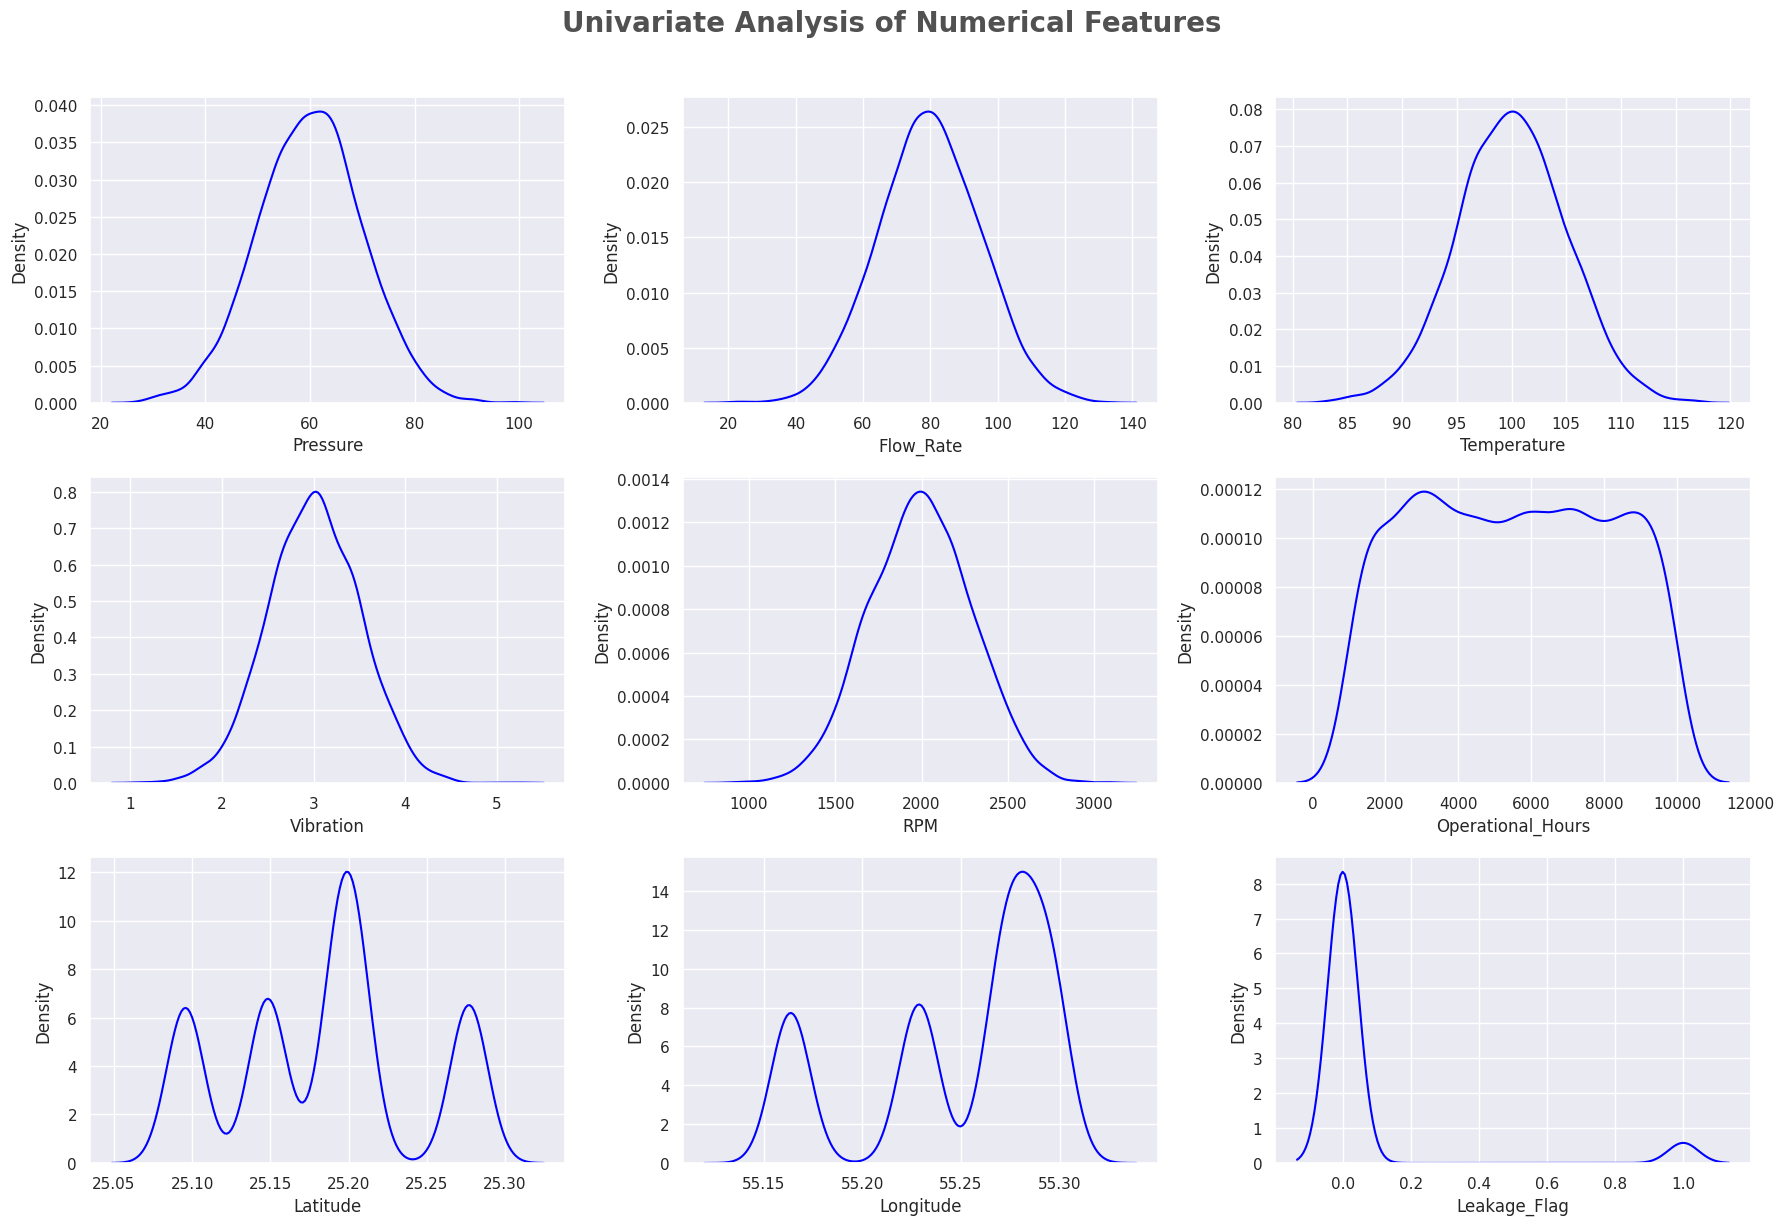

In [9]:
plt.figure(figsize=(18, 12))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numeric_features)):
    plt.subplot(3, 3, i + 1)  # <-- 4x4 grid (16 total slots)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

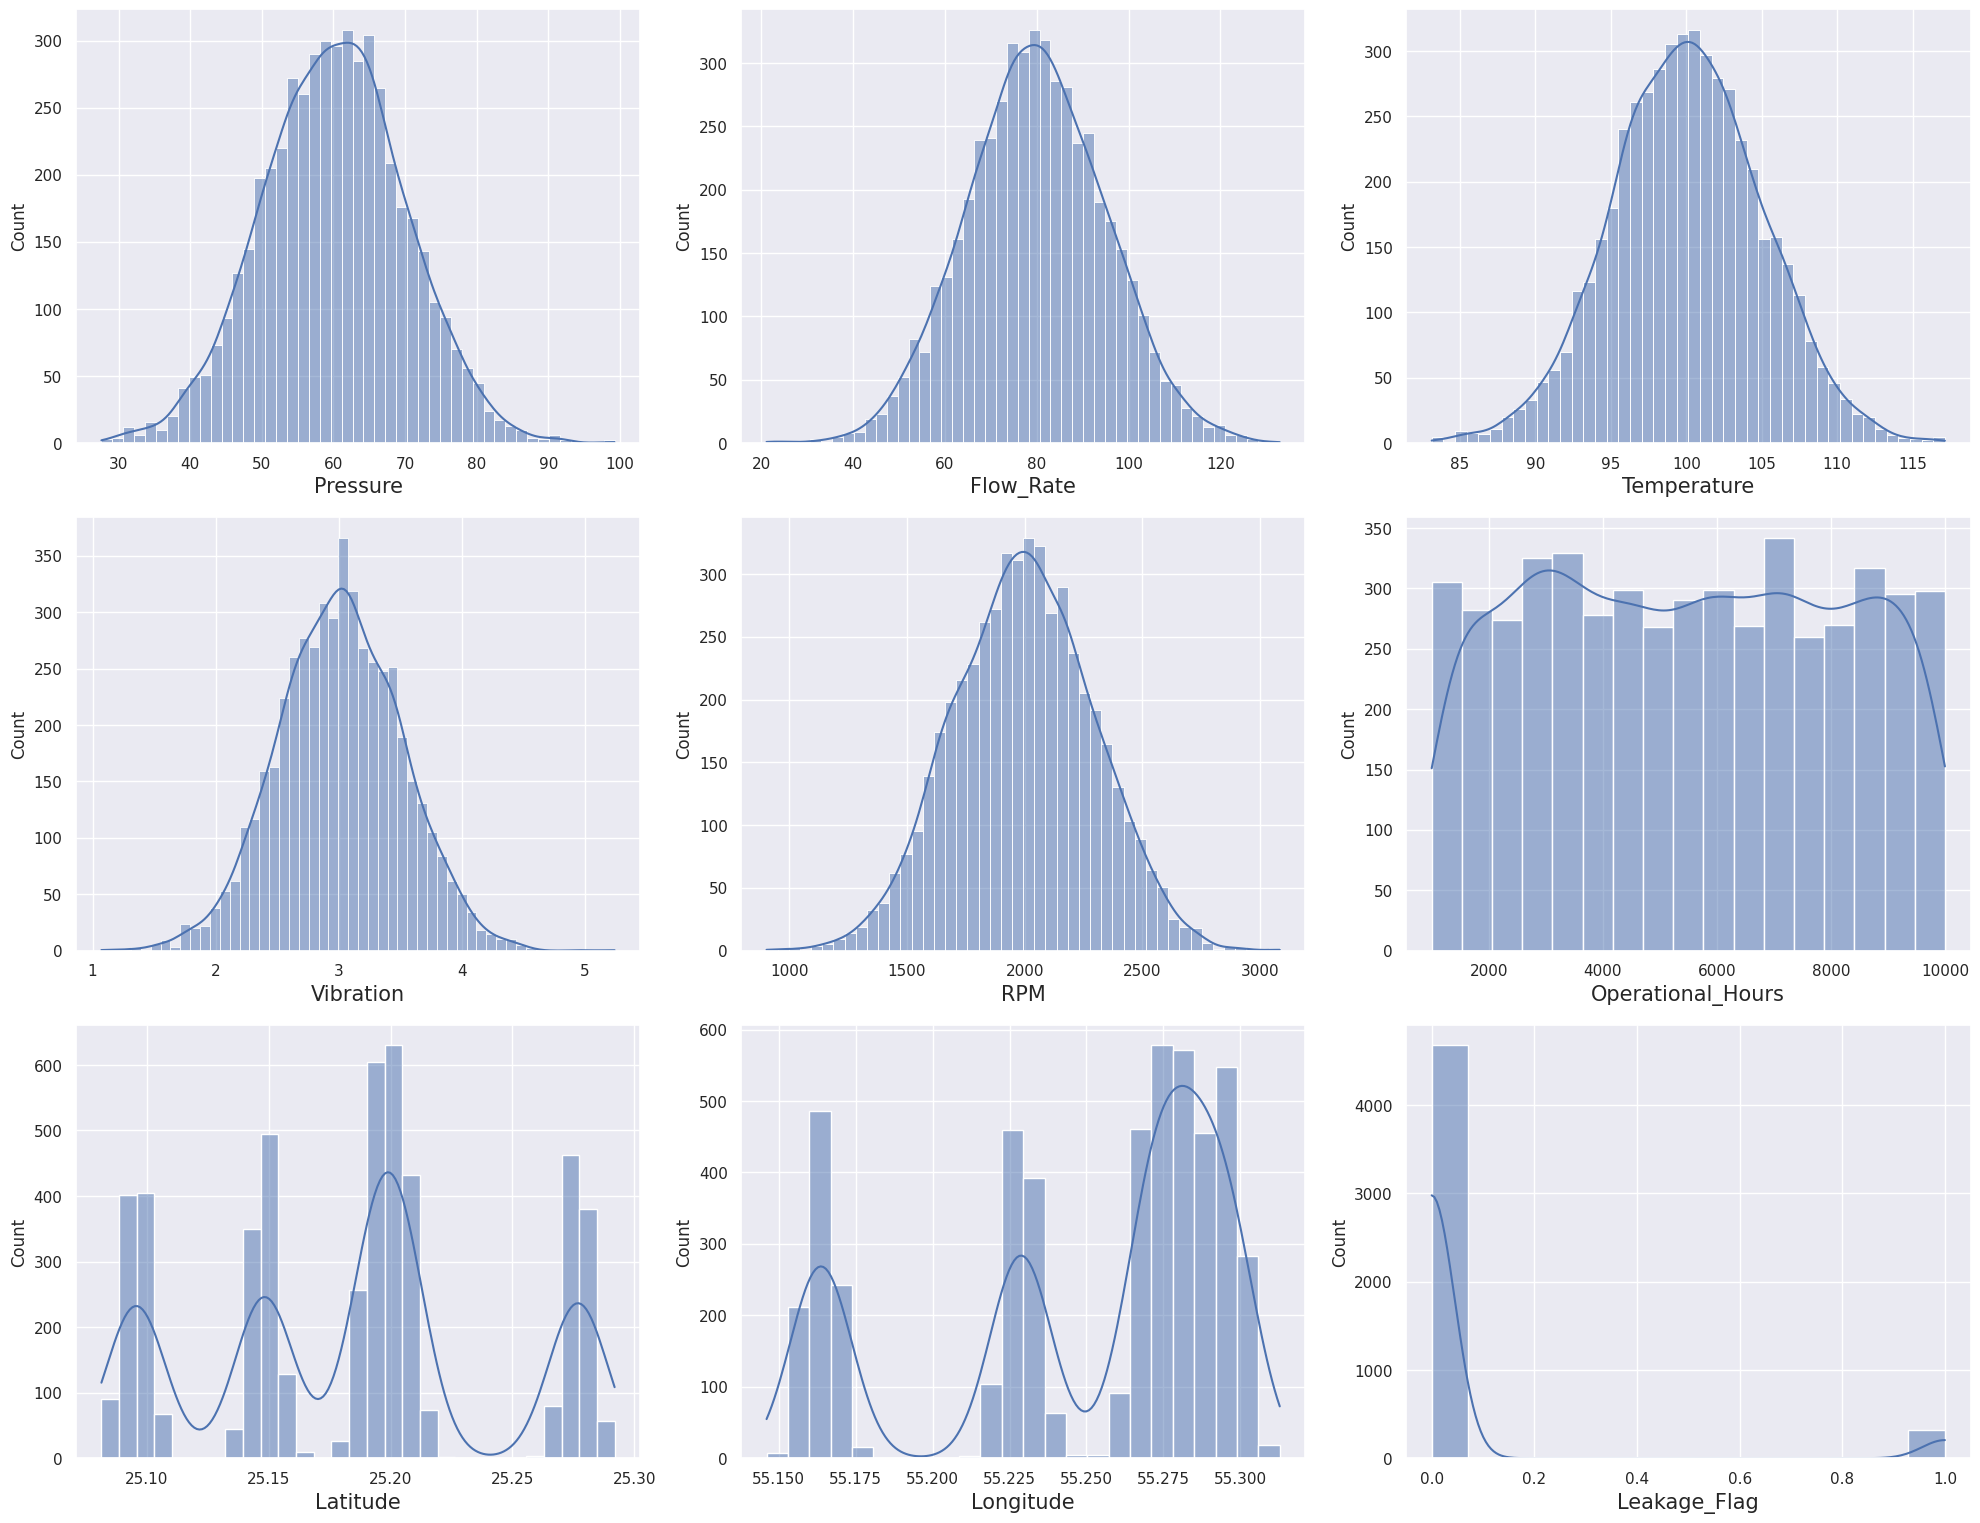

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

# Filter for numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

for column in numeric_df.columns:
    ax = plt.subplot(5,3,plotnumber) # Changed grid size to 4x4
    sns.histplot(numeric_df[column], kde=True)
    plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [11]:
df.head()

,Pressure,Flow_Rate,Temperature,Vibration,RPM,Operational_Hours,Zone,Block,Pipe,Location_Code,Latitude,Longitude,Leakage_Flag
0,64.967142,73.643605,96.607526,2.928288,2104.485874,3380,Zone_4,Block_2,Pipe_3,Zone_4_Block_2_Pipe_3,25.162560,55.238018,0
1,58.617357,73.198788,98.472503,2.983672,2084.997078,2235,Zone_3,Block_4,Pipe_1,Zone_3_Block_4_Pipe_1,25.090473,55.162476,0
2,66.476885,53.065352,97.013095,3.032147,1719.044046,8762,Zone_2,Block_2,Pipe_5,Zone_2_Block_2_Pipe_5,25.279196,55.287601,0
3,75.230299,75.048647,100.552090,3.473431,2173.875267,8931,Zone_5,Block_3,Pipe_2,Zone_5_Block_3_Pipe_2,25.198326,55.269765,0
4,57.658466,90.992436,105.985893,2.626391,1552.975197,3403,Zone_3,Block_1,Pipe_1,Zone_3_Block_1_Pipe_1,25.099630,55.166098,0


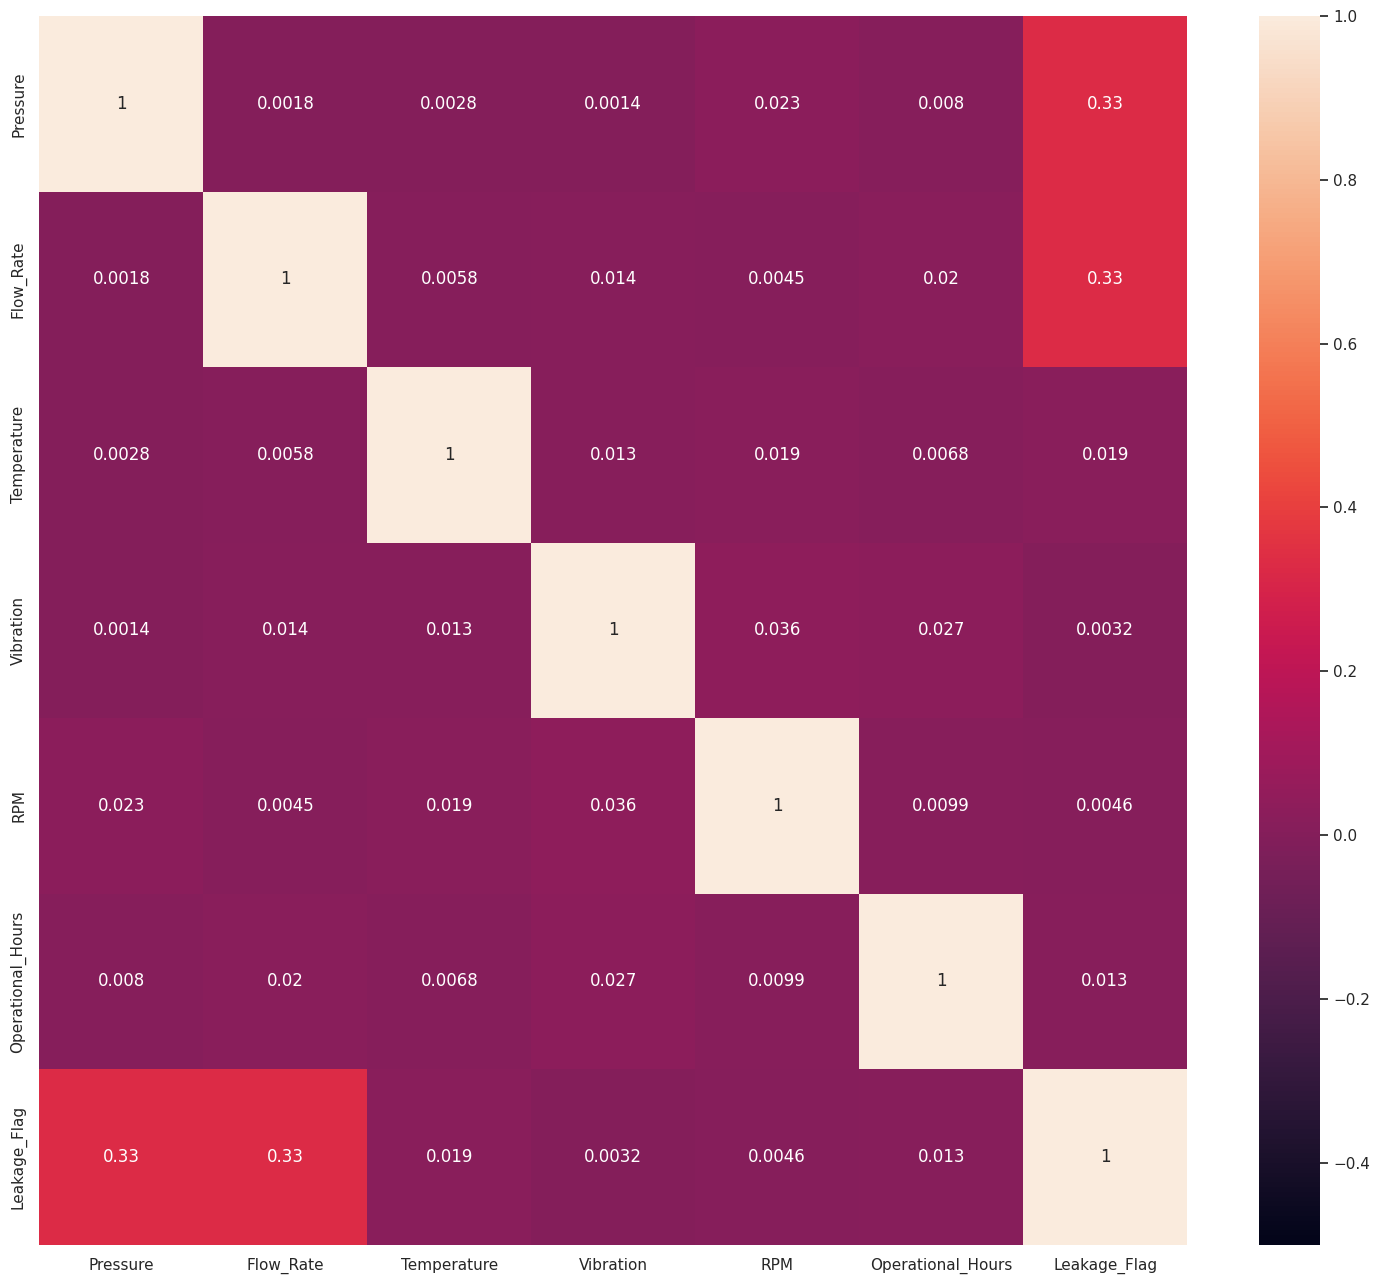

In [12]:
plt.figure(figsize=(15, 13))
df.drop(columns=['Zone', 'Block', 'Pipe','Location_Code', 'Latitude','Longitude'],inplace=True,errors='ignore')
sns.heatmap(df.corr().abs(), vmin=-0.5, vmax=1, annot=True)
plt.tight_layout()
plt.show()


In [13]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [14]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 0


In [15]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features),"\ncolumns:", discrete_features)

Num of Discrete Features : 1 
columns: ['Leakage_Flag']


In [16]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))


Num of Continuous Features : 6


In [17]:
continuous_features

['Pressure',
 'Flow_Rate',
 'Temperature',
 'Vibration',
 'RPM',
 'Operational_Hours']

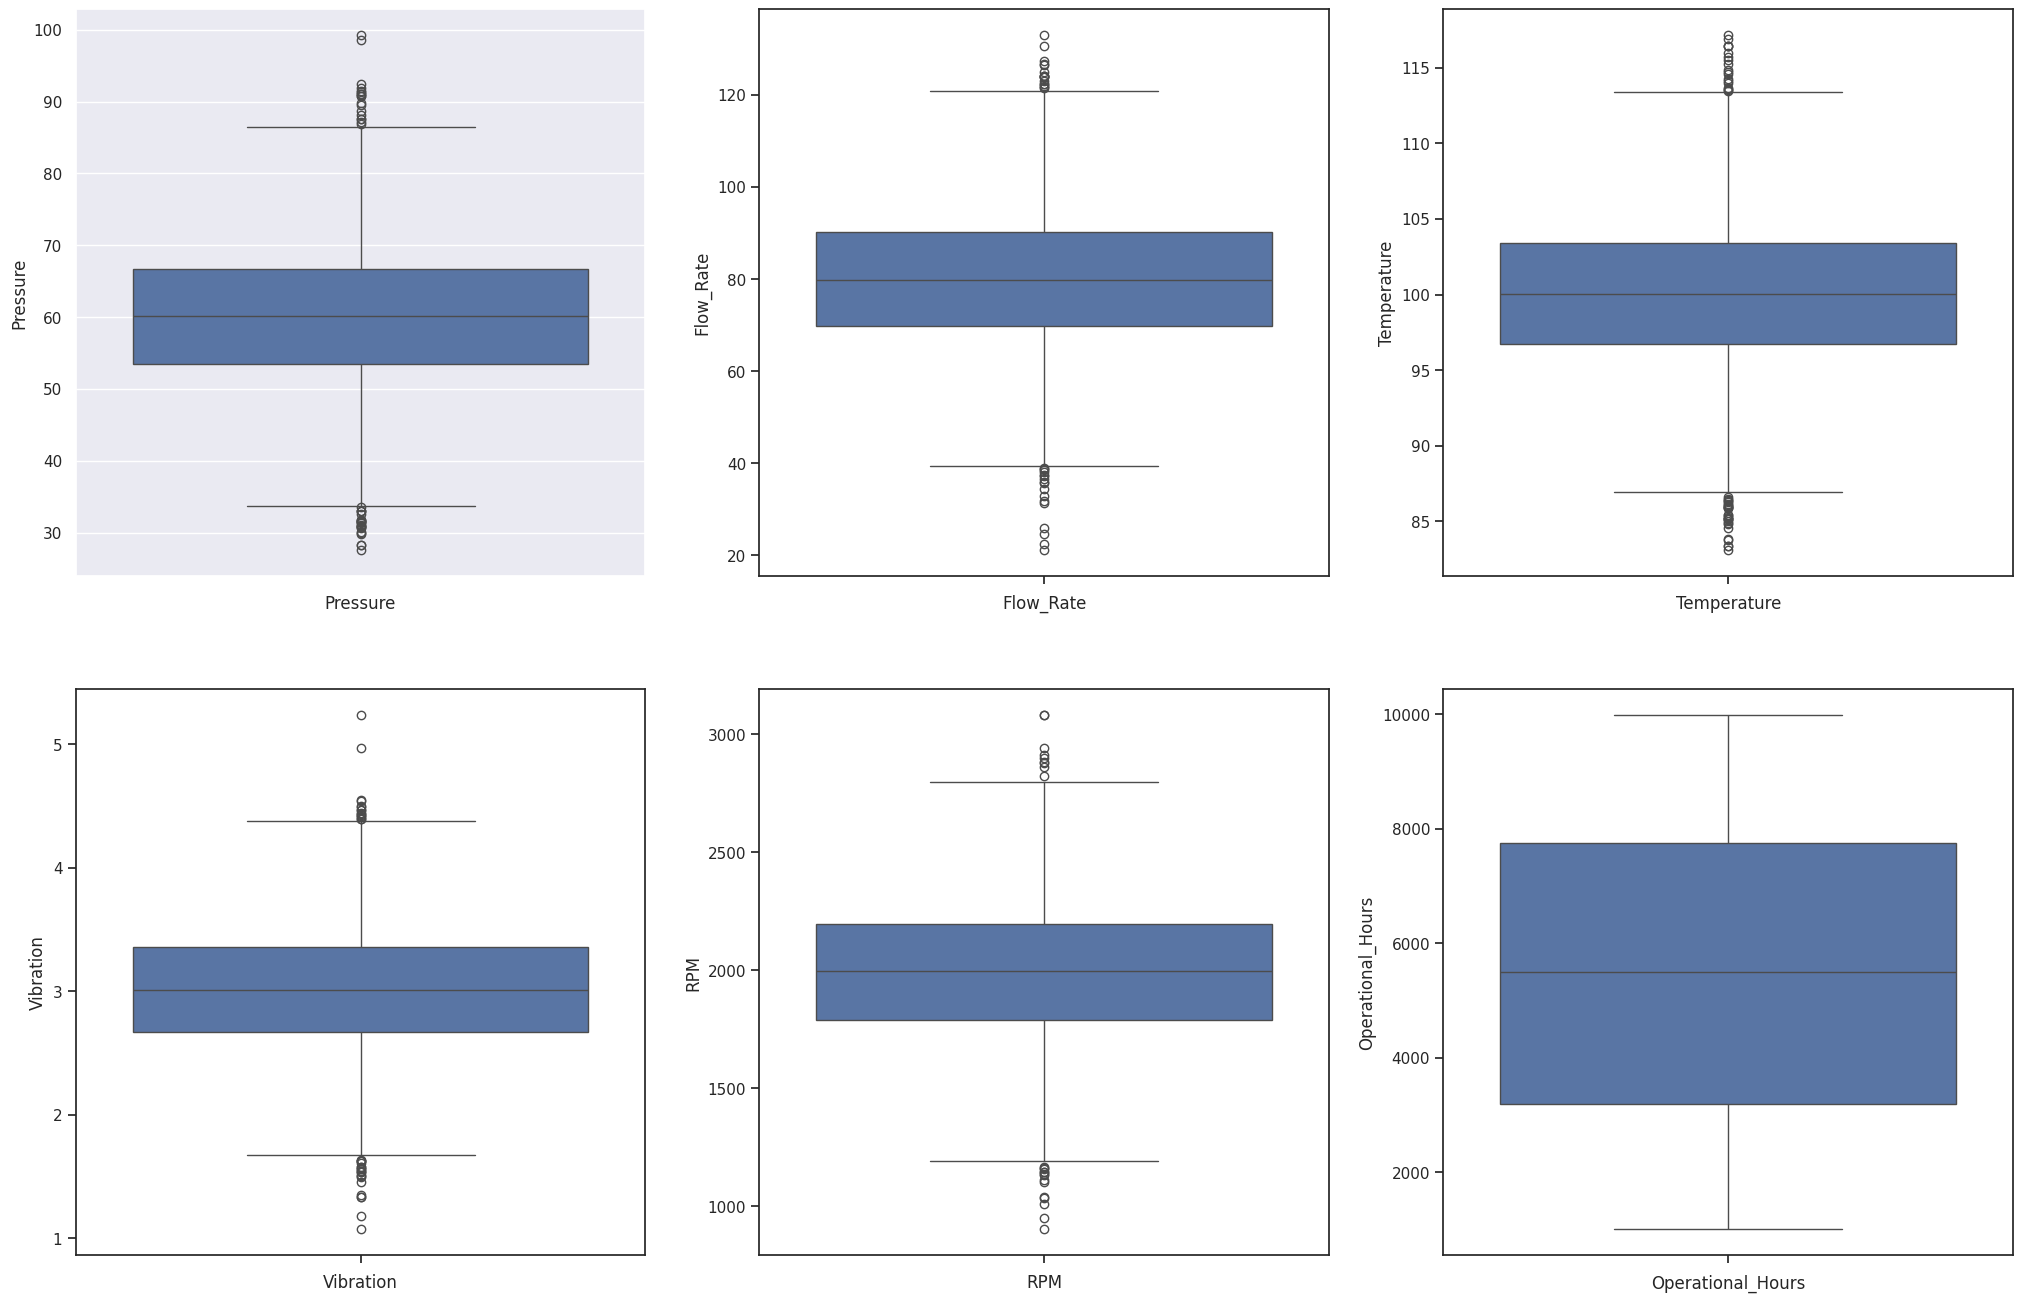

In [18]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 25))

for i in range(len(cont_features)):
        plt.subplot(3,3,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

In [19]:
def detect_outliers(col):
    # Calculate Q1 and Q3
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n####', col, '####')
    print("25th percentile:", percentile25)
    print("75th percentile:", percentile75)

    # Compute IQR and limits
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit:", upper_limit)
    print("Lower limit:", lower_limit)

    # Cap values outside limits
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit

    return df

# Apply function to all continuous features
for col in continuous_features:
    df = detect_outliers(col)


#### Pressure ####
25th percentile: 53.42094962342083
75th percentile: 66.66010607051726
Upper limit: 86.5188407411619
Lower limit: 33.56221495277619

#### Flow_Rate ####
25th percentile: 69.70125649075774
75th percentile: 90.15857098633133
Upper limit: 120.84454272969171
Lower limit: 39.01528474739737

#### Temperature ####
25th percentile: 96.69556816024944
75th percentile: 103.37767124381675
Upper limit: 113.40082586916772
Lower limit: 86.67241353489847

#### Vibration ####
25th percentile: 2.6676596281042775
75th percentile: 3.353307326397549
Upper limit: 4.381778873837456
Lower limit: 1.6391880806643702

#### RPM ####
25th percentile: 1789.4719677477563
75th percentile: 2195.1819317750274
Upper limit: 2803.746877815934
Lower limit: 1180.9070217068497

#### Operational_Hours ####
25th percentile: 3197.5
75th percentile: 7748.5
Upper limit: 14575.0
Lower limit: -3629.0


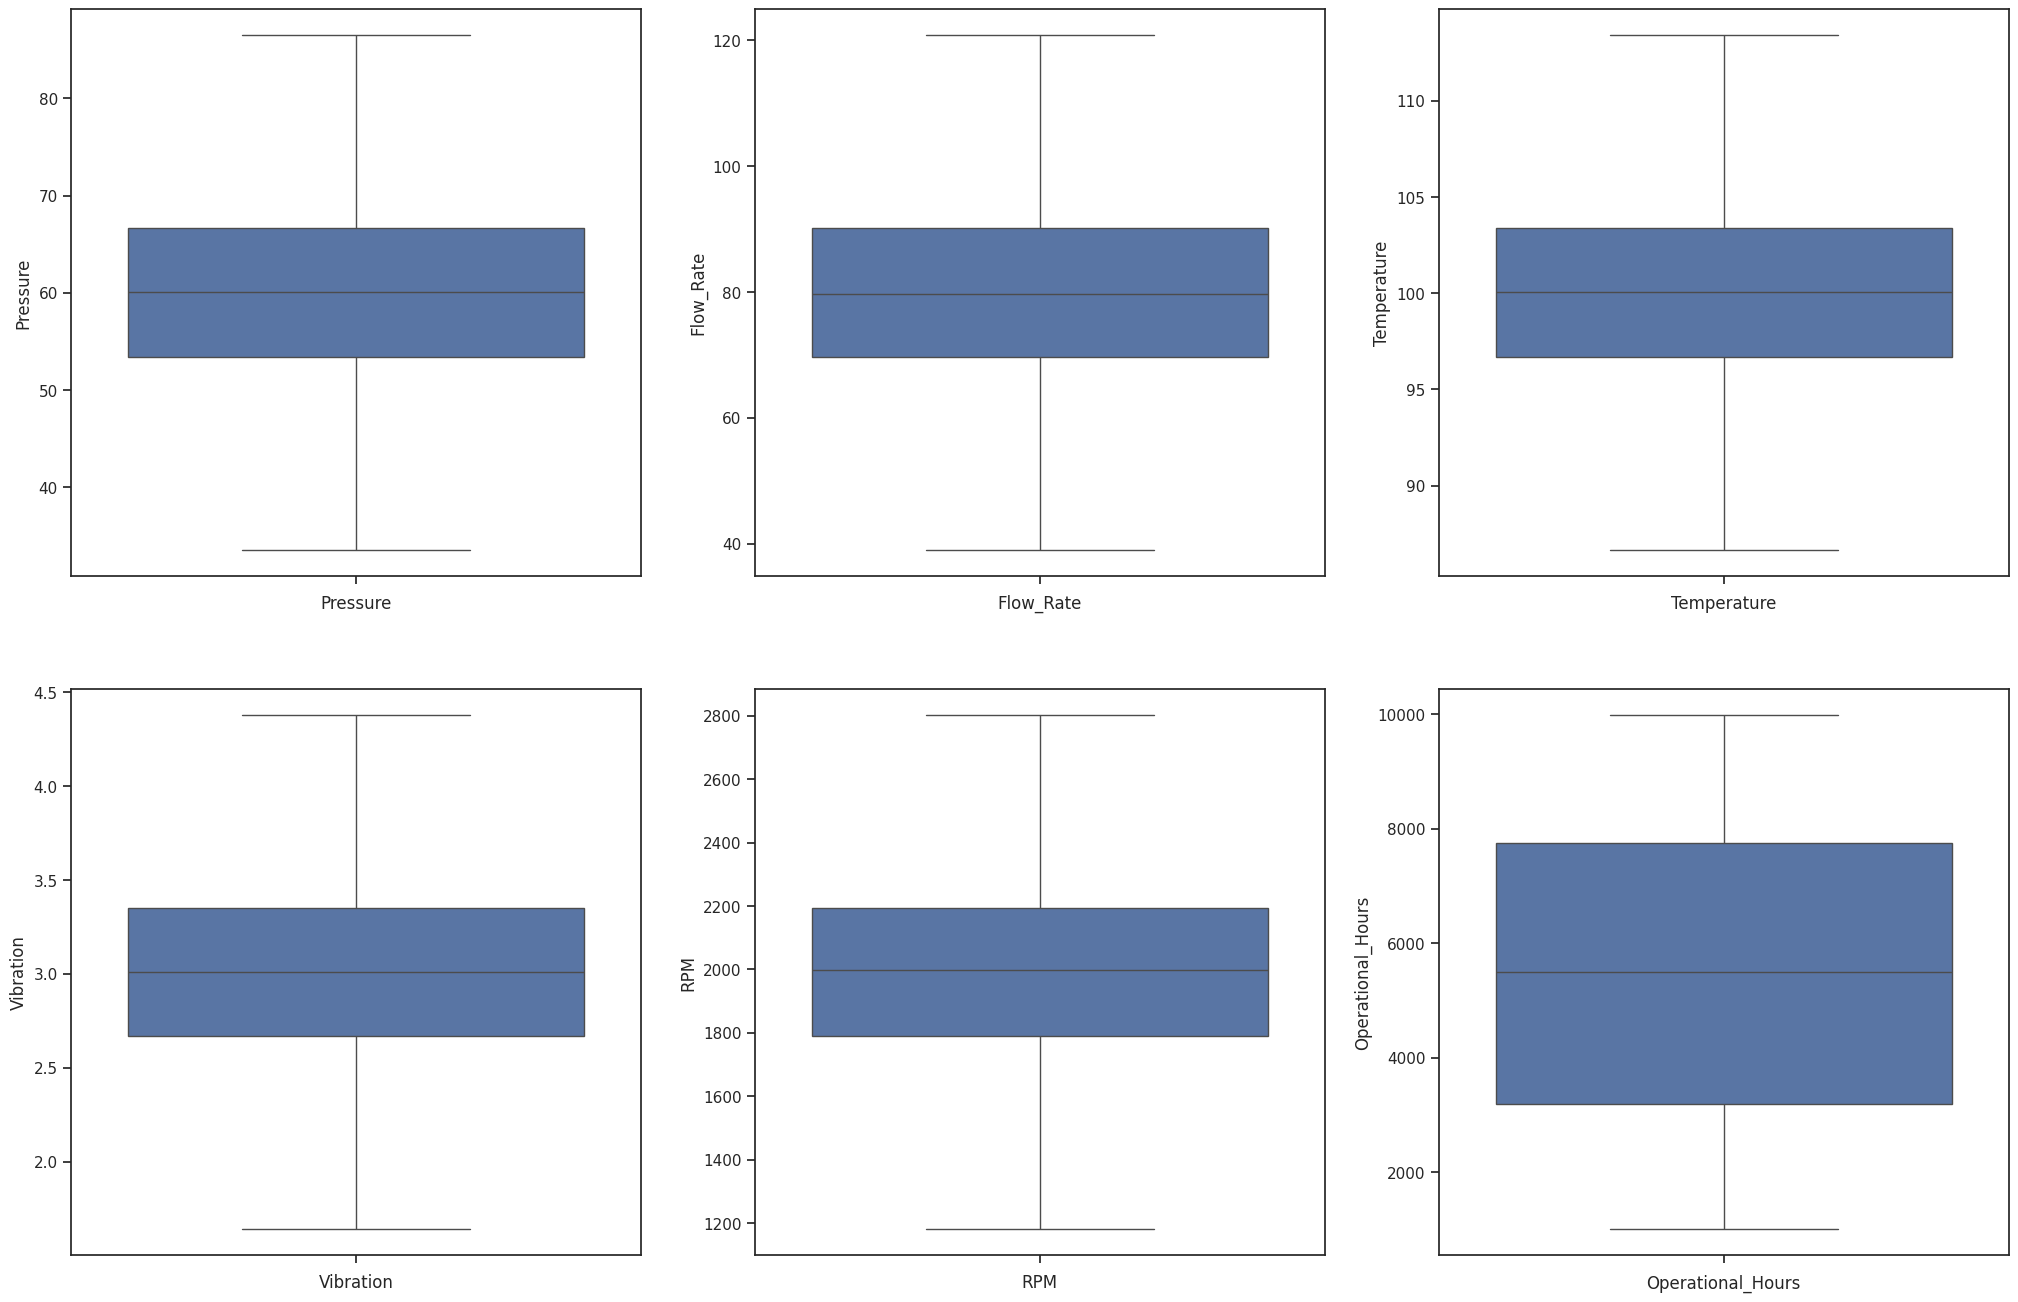

In [20]:
cont_features = continuous_features.copy()
plt.figure(figsize=(25, 25))

for i in range(len(cont_features)):
        plt.subplot(3,3,i+1)
        sns.set_style('ticks')
        plt.xlabel(cont_features[i])
        ax = sns.boxplot(df[cont_features[i]])

In [21]:
df[continuous_features].skew(axis=0, skipna=True)

,0
Pressure,-0.024308
Flow_Rate,0.030911
Temperature,-0.002749
Vibration,-0.004108
RPM,-0.012220
Operational_Hours,0.014573


Clustering

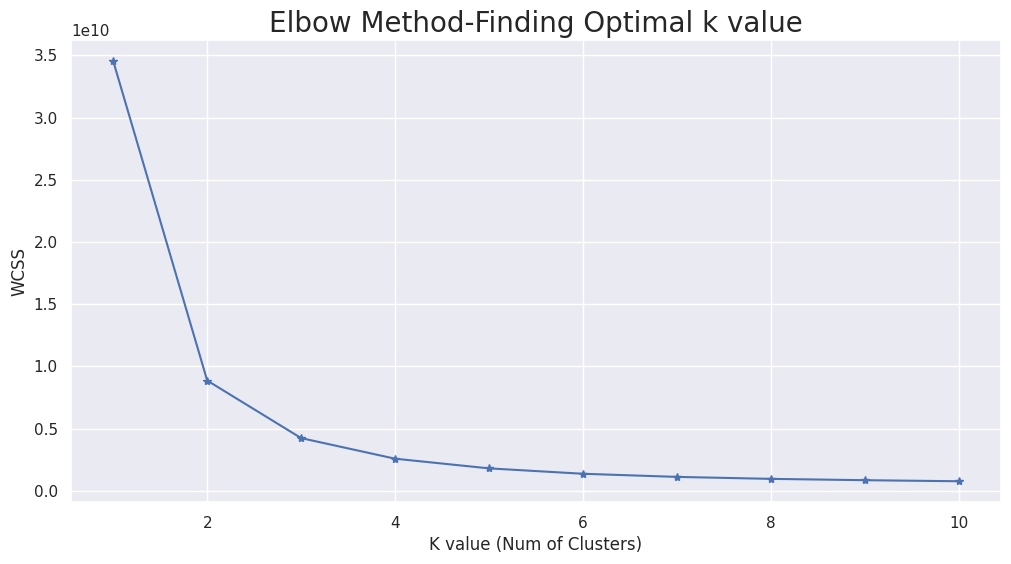

In [22]:
from sklearn.cluster import KMeans
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
df_numeric = df.select_dtypes(include='number')
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=42, n_init=10) # Added random_state and n_init for reproducibility
    km.fit(df_numeric) # Use the numeric DataFrame
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

In [23]:
!pip install kneed
from kneed import KneeLocator

def select_no_of_clusters(dataframe):

    wcss=[]
    try:
        df_numeric = dataframe.select_dtypes(include='number')
        for i in range (1,11):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42, n_init=10)
            kmeans.fit(df_numeric)
            wcss.append(kmeans.inertia_)
        kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
        print('The optimum number of clusters is: '+str(kn.knee)+' . Exited the elbow_plot method of the KMeansClustering class')
        return kn.knee
    except Exception as e:
        print(e)
no_of_clusters = select_no_of_clusters(df)
print("no of clusters is", no_of_clusters)
df_numeric_final = df.select_dtypes(include='number')
kmeans = KMeans(n_clusters=no_of_clusters, random_state=42, n_init=10)
kmeans.fit(df_numeric_final)
labels = kmeans.predict(df_numeric_final)
df['Cluster'] = labels

The optimum number of clusters is: 3 . Exited the elbow_plot method of the KMeansClustering class
no of clusters is 3


In [24]:
df.head()

,Pressure,Flow_Rate,Temperature,Vibration,RPM,Operational_Hours,Leakage_Flag,Cluster
0,64.967142,73.643605,96.607526,2.928288,2104.485874,3380,0,1
1,58.617357,73.198788,98.472503,2.983672,2084.997078,2235,0,1
2,66.476885,53.065352,97.013095,3.032147,1719.044046,8762,0,0
3,75.230299,75.048647,100.552090,3.473431,2173.875267,8931,0,0
4,57.658466,90.992436,105.985893,2.626391,1552.975197,3403,0,1


In [25]:
feature = df[['Pressure','Flow_Rate','Temperature', 'Vibration','RPM','Operational_Hours']]

In [26]:
!pip install dask[distributed] kneed scikit-learn

import dask.distributed as distributed
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

cluster = distributed.LocalCluster()
client = distributed.Client(cluster)
client.restart()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature)

models = {
    'KMeans': KMeans(n_clusters=3, random_state=42, n_init=10),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'GaussianMixture': GaussianMixture(n_components=3, random_state=42),
    'PCA': PCA(n_components=2, random_state=42),
    'IsolationForest': IsolationForest(contamination=0.1, random_state=42)
}

def select_best_unsupervised_model(models, X):
    results = []
    for name, model in models.items():
        try:
            if name in ['GaussianMixture']:
                labels = model.fit_predict(X)
            elif name in ['PCA']:
                transformed = model.fit_transform(X)
                labels = KMeans(n_clusters=3, random_state=42).fit_predict(transformed)
            elif name in ['IsolationForest']:
                labels = model.fit_predict(X)
            else:
                labels = model.fit_predict(X)

            if len(np.unique(labels)) <= 1:
                silhouette = np.nan
                db_index = np.nan
            else:
                silhouette = silhouette_score(X, labels)
                db_index = davies_bouldin_score(X, labels)

            results.append({
                'model_name': name,
                'silhouette_score': silhouette,
                'davies_bouldin_index': db_index
            })
            print(f"{name} model evaluated successfully.")

        except Exception as e:
            print(f"{name} failed: {e}")

    return pd.DataFrame(results).sort_values(by='silhouette_score', ascending=False)

results_df = select_best_unsupervised_model(models, X_scaled)
print("\nModel Performance Summary:")
print(results_df)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38533
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46433'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46033'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:46355 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:46355
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:56048
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:43401 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:43401
INFO:distributed.core:Starting established connection to tcp://127

KMeans model evaluated successfully.
DBSCAN model evaluated successfully.
AgglomerativeClustering model evaluated successfully.
GaussianMixture model evaluated successfully.
PCA model evaluated successfully.
IsolationForest model evaluated successfully.

Model Performance Summary:
                model_name  silhouette_score  davies_bouldin_index
5          IsolationForest          0.194942             19.027949
0                   KMeans          0.111809              2.226051
4                      PCA          0.104177              2.305981
3          GaussianMixture          0.101095              2.437235
2  AgglomerativeClustering          0.063520              2.865838
1                   DBSCAN         -0.289728              2.741501


In [27]:
# ================================================
# Step 1: Import necessary libraries
# ================================================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib  # for saving the trained model

# ================================================
# Step 2: Define features (only numerical columns)
# ================================================
feature_columns = ['Pressure','Flow_Rate','Temperature', 'Vibration','RPM','Operational_Hours']

# ================================================
# Step 3: Prepare the data
# ================================================
X = df[feature_columns]

# Scale the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================================
# Step 4: Train the Isolation Forest model
# ================================================
iso_forest = IsolationForest(
    n_estimators=200,          # number of trees
    contamination='auto',      # automatically determines anomalies
    random_state=42
)
iso_forest.fit(X_scaled)

# Predict cluster labels (normal = 1, anomaly = -1)
labels = iso_forest.predict(X_scaled)
df['Cluster'] = labels

# ================================================
# Step 5: Evaluate model performance
# ================================================
# (Convert labels from {-1, 1} to {0, 1} for metrics)
import numpy as np
labels_mapped = np.where(labels == -1, 0, 1)

sil_score = silhouette_score(X_scaled, labels_mapped)
db_score = davies_bouldin_score(X_scaled, labels_mapped)

print(f"Isolation Forest trained successfully!")
print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies–Bouldin Index: {db_score:.4f}")

# ================================================
# Step 6: Save the trained model and scaler
# ================================================
joblib.dump(iso_forest, "final_isolation_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully as 'final_isolation_forest_model.pkl' and 'scaler.pkl'.")

# ================================================
# Step 7: Optional - Show result summary
# ================================================
cluster_summary = df.groupby('Cluster')[feature_columns].mean()
print("\nCluster Summary (Average Values):")
print(cluster_summary)


Isolation Forest trained successfully!
Silhouette Score: 0.1513
Davies–Bouldin Index: 40.0298
Model and scaler saved successfully as 'final_isolation_forest_model.pkl' and 'scaler.pkl'.

Cluster Summary (Average Values):
          Pressure  Flow_Rate  Temperature  Vibration          RPM  \
Cluster                                                              
-1       59.824613  80.739097    99.674829   2.995704  1984.319284   
 1       60.109630  79.639497   100.148751   3.011583  1997.078748   

         Operational_Hours  
Cluster                     
-1             5479.775326  
 1             5490.357982  
